### Fuzzy Triangular Membership Functions


#### Version 1.0

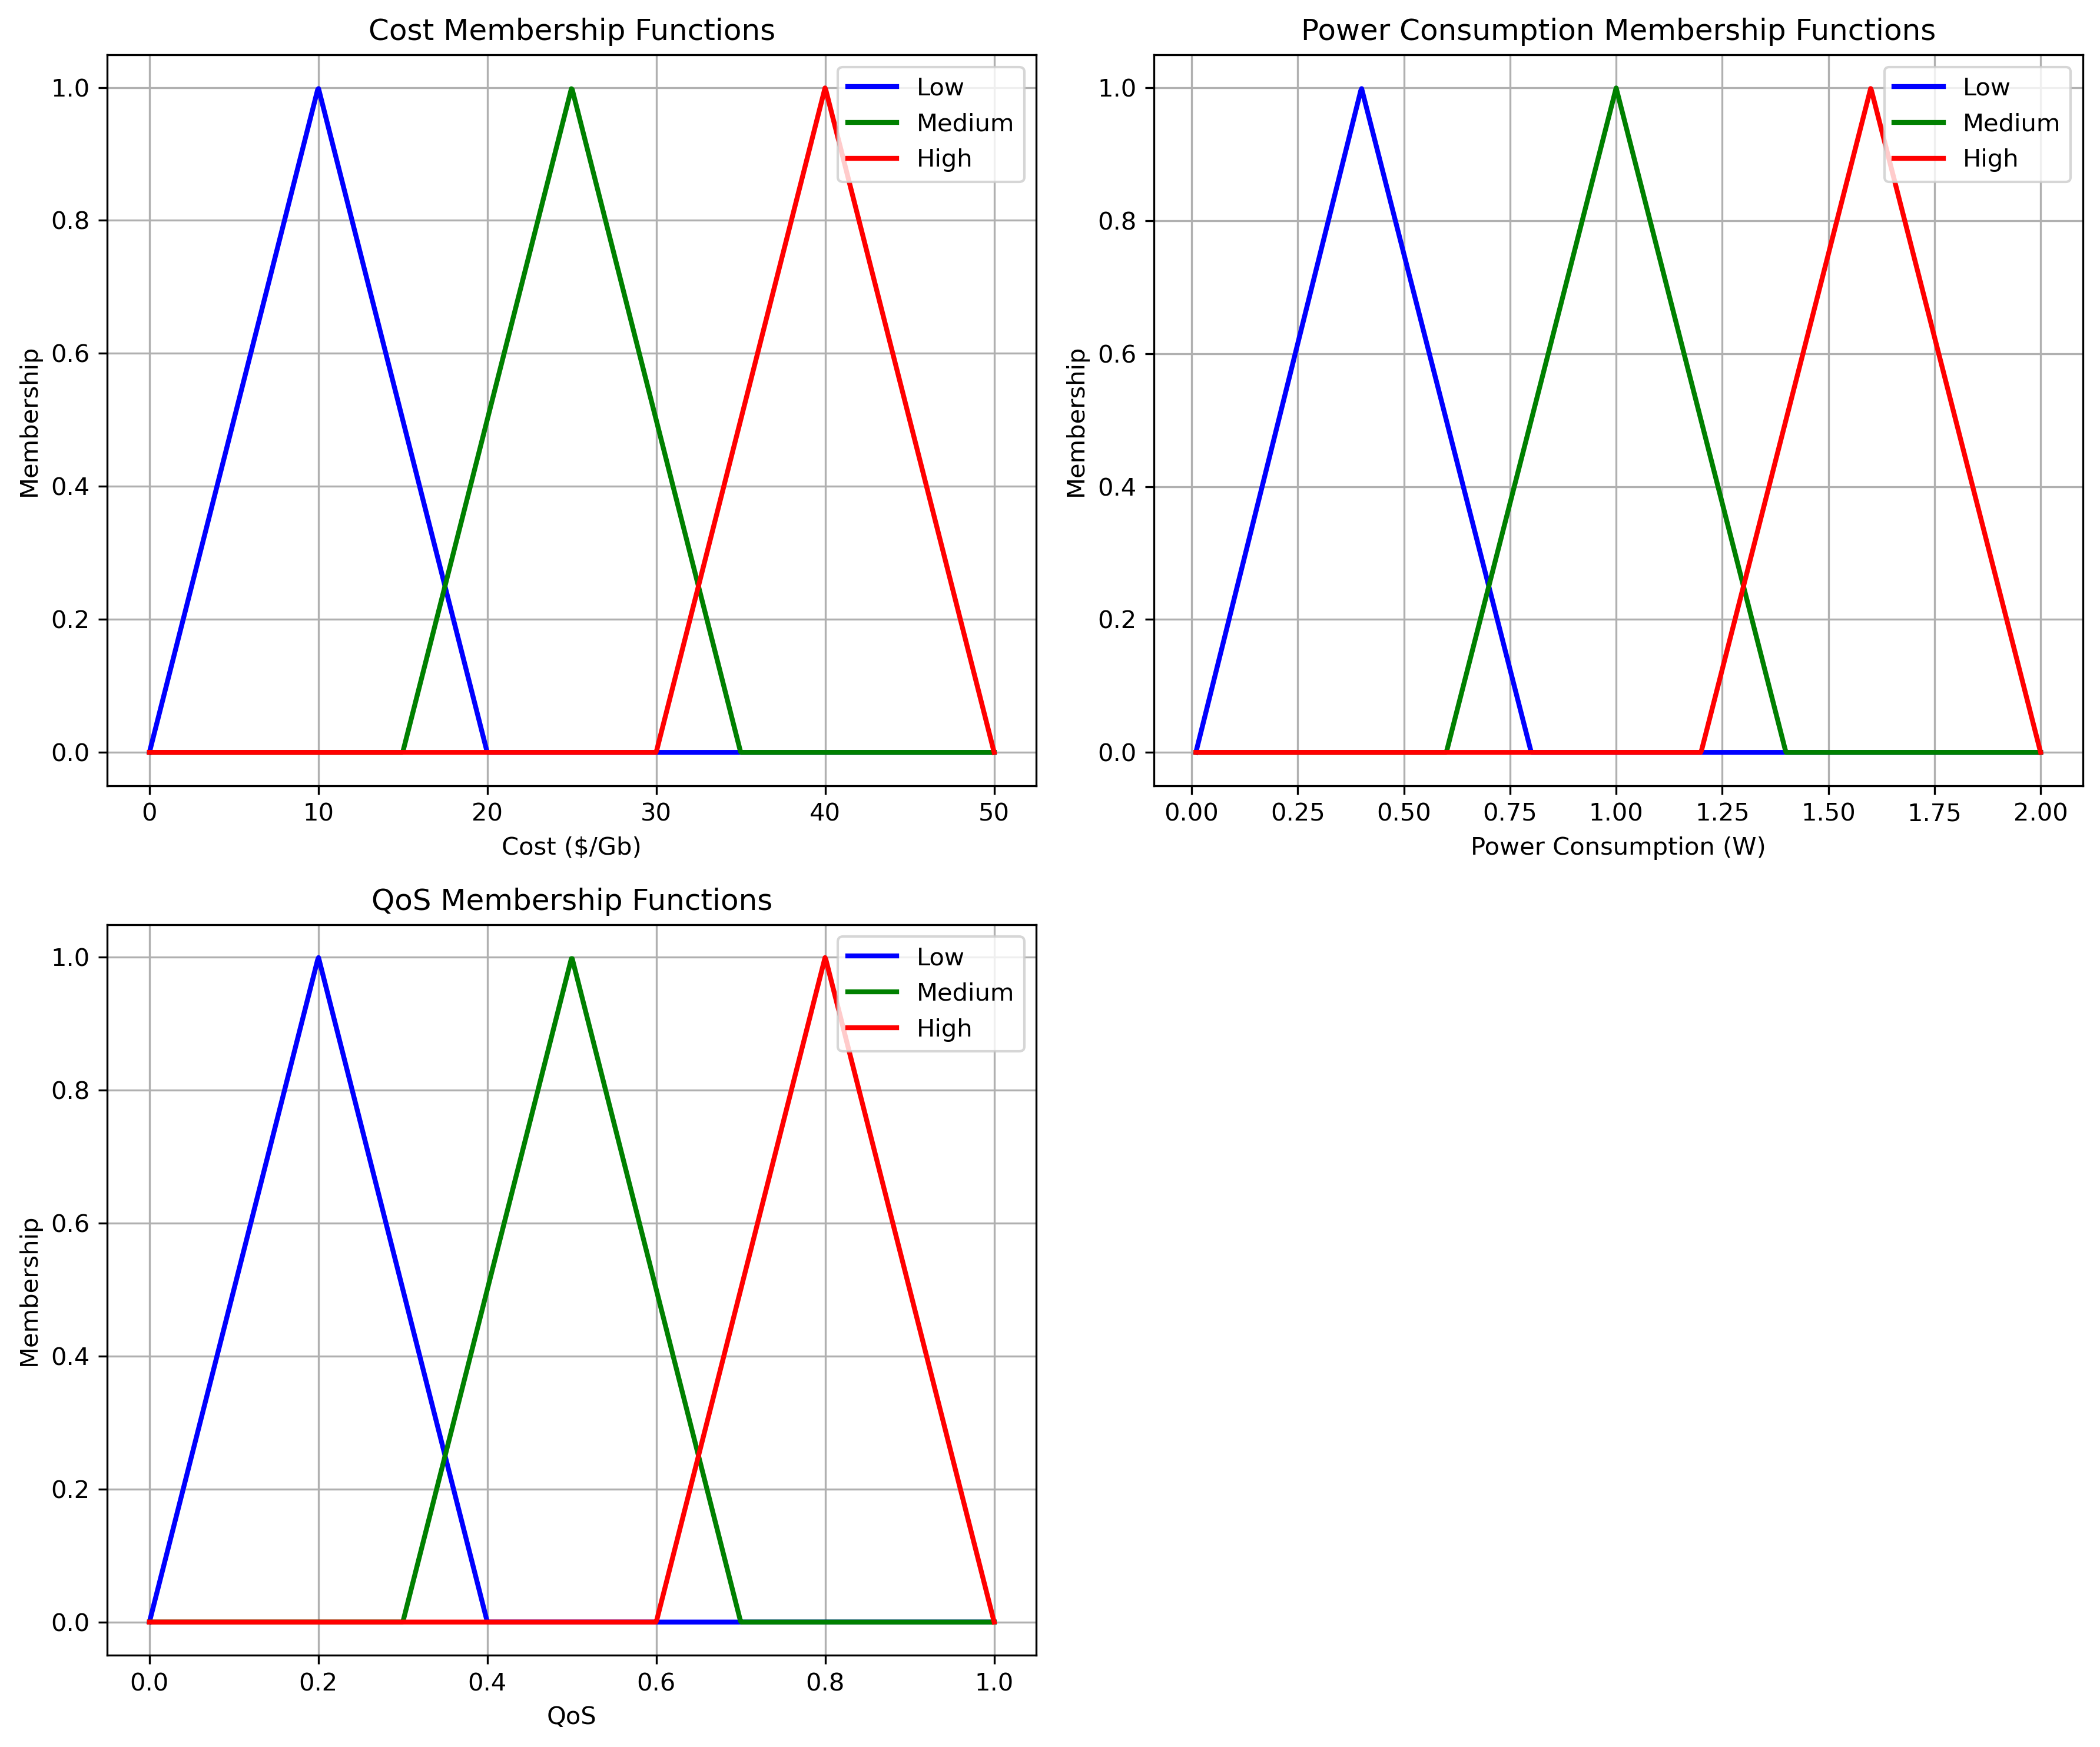

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Image


def triangular_mf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def plot_membership_functions(ax, x, low, medium, high, title, xlabel):
    ax.plot(x, low, 'b-', linewidth=2, label='Low')
    ax.plot(x, medium, 'g-', linewidth=2, label='Medium')
    ax.plot(x, high, 'r-', linewidth=2, label='High')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Membership')
    ax.legend()
    ax.grid(True)

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.delaxes(axs[1, 1])  # Remove the fourth subplot

# Graph 1: Cost (0.01 to 50 $/Gb)
x_cost = np.linspace(0.01, 50, 1000)
cost_low = triangular_mf(x_cost, 0.01, 10, 20)
cost_medium = triangular_mf(x_cost, 15, 25, 35)
cost_high = triangular_mf(x_cost, 30, 40, 50)
plot_membership_functions(axs[0, 0], x_cost, cost_low, cost_medium, cost_high, 'Cost Membership Functions', 'Cost ($/Gb)')

# Graph 2: Power Consumption (0.01 to 2 W)
x_power = np.linspace(0.01, 2, 1000)
power_low = triangular_mf(x_power, 0.01, 0.4, 0.8)
power_medium = triangular_mf(x_power, 0.6, 1, 1.4)
power_high = triangular_mf(x_power, 1.2, 1.6, 2)
plot_membership_functions(axs[0, 1], x_power, power_low, power_medium, power_high, 'Power Consumption Membership Functions', 'Power Consumption (W)')

# Graph 3: QoS (0 to 1)
x_qos = np.linspace(0, 1, 1000)
qos_low = triangular_mf(x_qos, 0, 0.2, 0.4)
qos_medium = triangular_mf(x_qos, 0.3, 0.5, 0.7)
qos_high = triangular_mf(x_qos, 0.6, 0.8, 1)
plot_membership_functions(axs[1, 0], x_qos, qos_low, qos_medium, qos_high, 'QoS Membership Functions', 'QoS')

# Adjust the layout and display the plots
#plt.tight_layout()
#plt.show()

# Adjust the layout
plt.tight_layout()

# Save the figure
filename = 'membership_functions.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Display the saved image
display(Image(filename=filename))

# Optional: Close the figure to free up memory
plt.close(fig)

#### Version 1.1


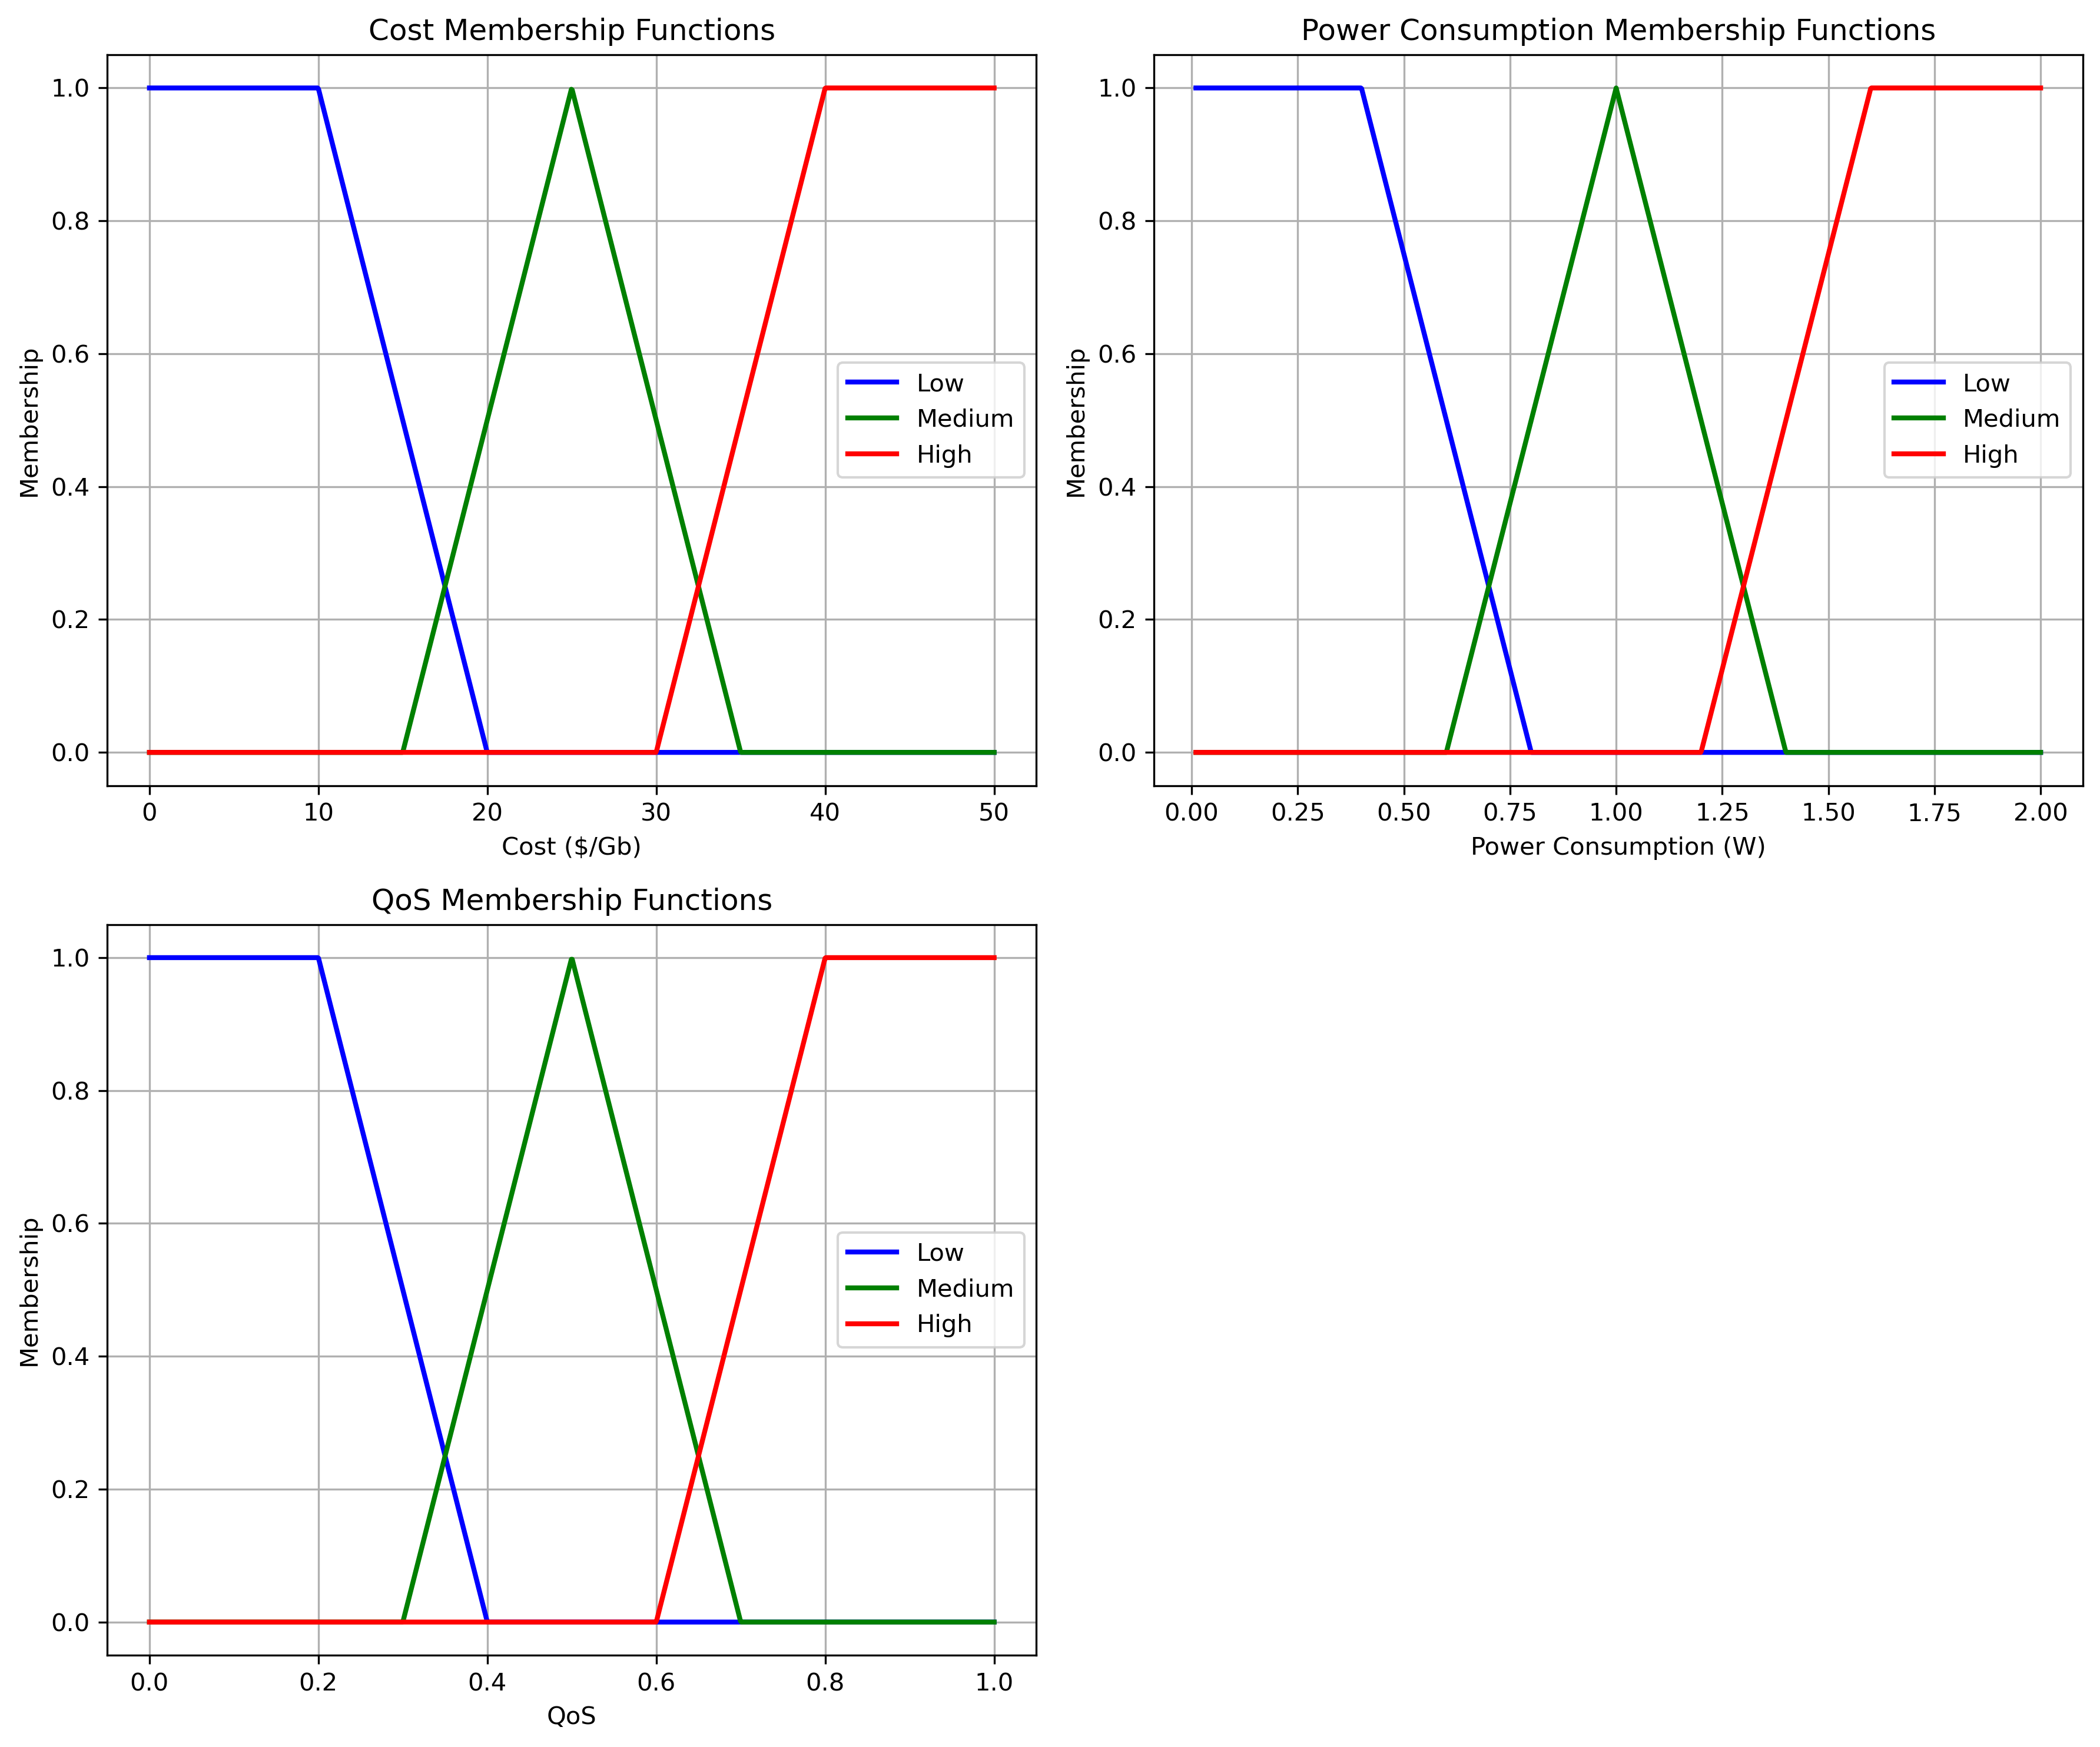

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

def low_mf(x, a, b):
    return np.where(x <= a, 1, np.maximum(0, (b - x) / (b - a)))

def medium_mf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

def high_mf(x, b, c):
    return np.where(x >= c, 1, np.maximum(0, (x - b) / (c - b)))

def plot_membership_functions(ax, x, low, medium, high, title, xlabel):
    ax.plot(x, low, 'b-', linewidth=2, label='Low')
    ax.plot(x, medium, 'g-', linewidth=2, label='Medium')
    ax.plot(x, high, 'r-', linewidth=2, label='High')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Membership')
    ax.legend()
    ax.grid(True)

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.delaxes(axs[1, 1])  # Remove the fourth subplot

# Graph 1: Cost (0.01 to 50 $/Gb)
x_cost = np.linspace(0.01, 50, 1000)
cost_low = low_mf(x_cost, 10, 20)
cost_medium = medium_mf(x_cost, 15, 25, 35)
cost_high = high_mf(x_cost, 30, 40)
plot_membership_functions(axs[0, 0], x_cost, cost_low, cost_medium, cost_high, 'Cost Membership Functions', 'Cost ($/Gb)')

# Graph 2: Power Consumption (0.01 to 2 W)
x_power = np.linspace(0.01, 2, 1000)
power_low = low_mf(x_power, 0.4, 0.8)
power_medium = medium_mf(x_power, 0.6, 1, 1.4)
power_high = high_mf(x_power, 1.2, 1.6)
plot_membership_functions(axs[0, 1], x_power, power_low, power_medium, power_high, 'Power Consumption Membership Functions', 'Power Consumption (W)')

# Graph 3: QoS (0 to 1)
x_qos = np.linspace(0, 1, 1000)
qos_low = low_mf(x_qos, 0.2, 0.4)
qos_medium = medium_mf(x_qos, 0.3, 0.5, 0.7)
qos_high = high_mf(x_qos, 0.6, 0.8)
plot_membership_functions(axs[1, 0], x_qos, qos_low, qos_medium, qos_high, 'QoS Membership Functions', 'QoS')

# Adjust the layout
plt.tight_layout()

# Save the figure
filename = 'membership_functions.png'
plt.savefig(filename, dpi=300, bbox_inches='tight')

# Display the saved image
display(Image(filename=filename))

# Close the figure to free up memory
plt.close(fig)